In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.set_index('PassengerId', inplace=True)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df[df.Cabin.isnull()].count()

Survived    687
Pclass      687
Name        687
Sex         687
Age         529
SibSp       687
Parch       687
Ticket      687
Fare        687
Cabin         0
Embarked    687
dtype: int64

In [8]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
df.drop('Ticket', axis=1,inplace=True)
df.drop('Cabin', axis=1,inplace=True)


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [12]:
titles=set()
for name in df.Name:
    titles.add(name.split(',')[1].split('.')[0].strip())
    


In [13]:
print(titles)

{'Lady', 'Don', 'Sir', 'Mr', 'Ms', 'Mrs', 'Major', 'Mlle', 'Col', 'Jonkheer', 'Dr', 'Rev', 'the Countess', 'Mme', 'Master', 'Miss', 'Capt'}


In [14]:
len(titles)

17

In [15]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
df['Title'] = df.Title.map(Title_Dictionary)

In [16]:
df.drop('Name', axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [18]:
df[df.Age.isnull()].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [19]:
for k in df.keys():
    print('{0}: {1}'.format(k, len(df[k].unique())))

Survived: 2
Pclass: 3
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Fare: 248
Embarked: 4
Title: 6


In [20]:
for k in df.keys():
    print("{} : {}".format(k, df[k].unique()))

Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
Age : [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6]
Fare : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  3

In [21]:
df['Died'] = 1 - df['Survived']

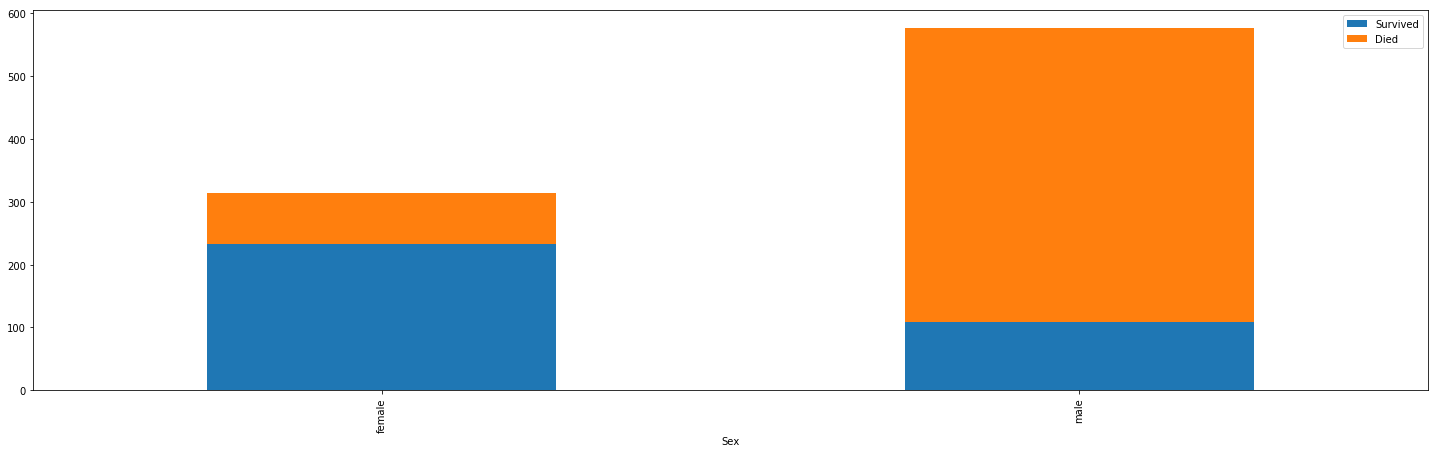

In [22]:



df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),stacked=True)
                                                          


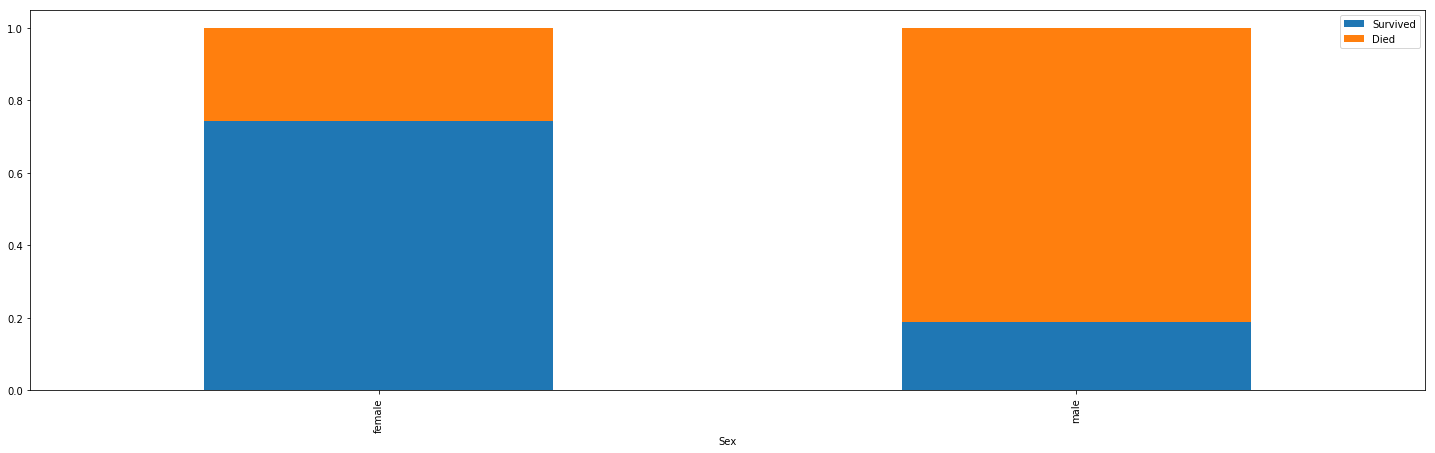

In [23]:

df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True)


In [24]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

C:\Users\Nikola\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


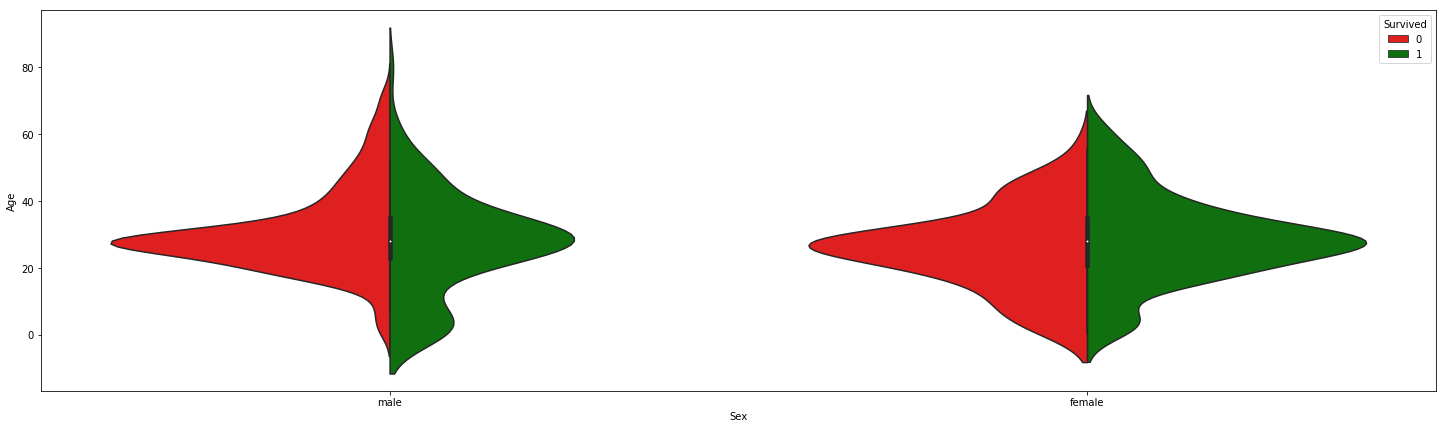

In [25]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x=df.Sex, y=df.Age, 
               hue=df.Survived, df=df, 
               split=True,
               palette={0: "r", 1: "g"}
              );

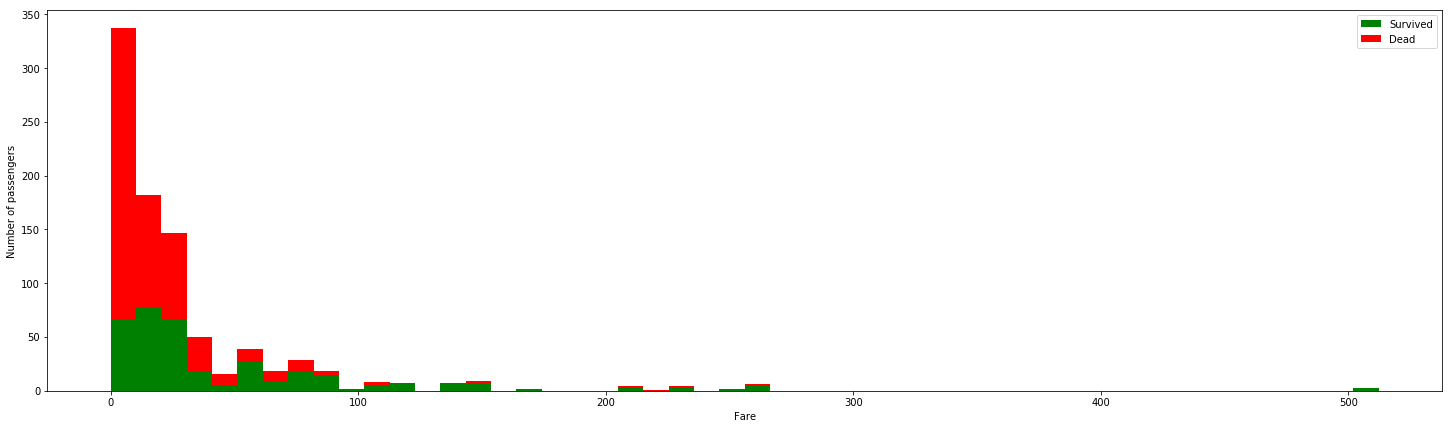

In [26]:
figure = plt.figure(figsize=(25, 7))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

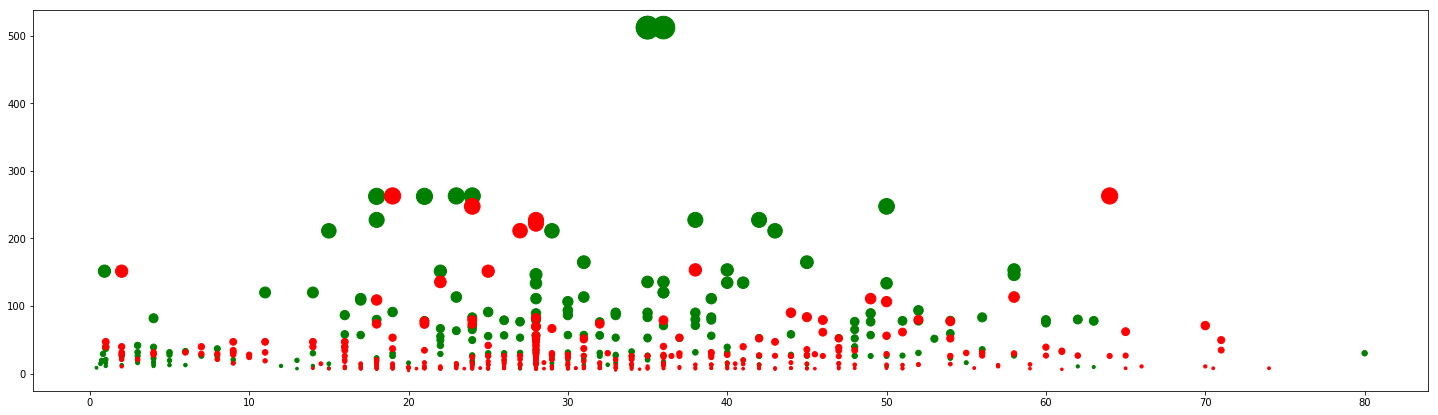

In [27]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], 
           c='green', s=df[df['Survived'] == 1]['Fare'])
ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], 
           c='red', s=df[df['Survived'] == 0]['Fare']);

C:\Users\Nikola\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


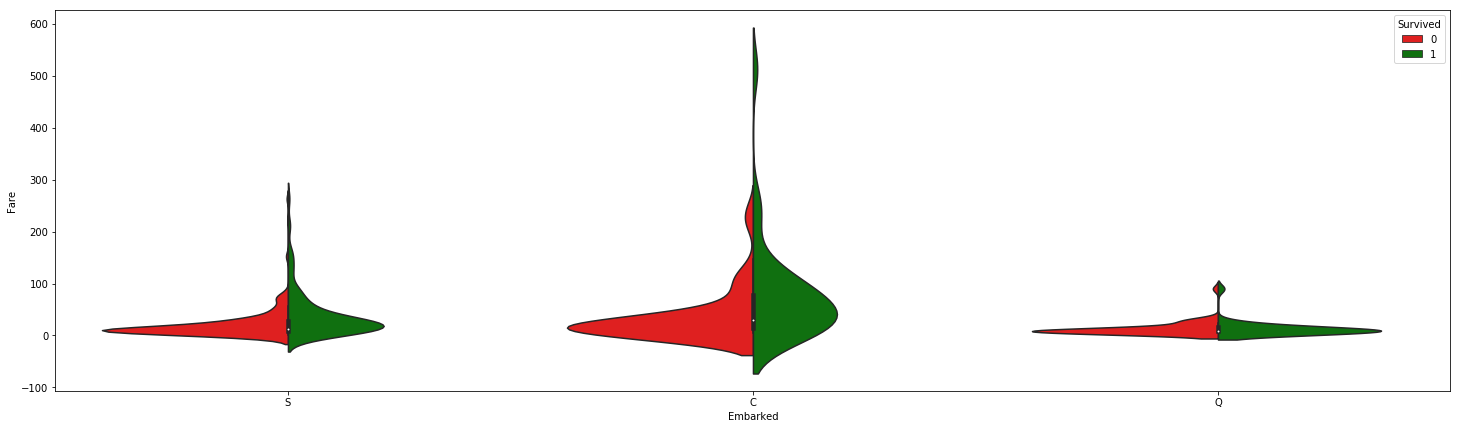

In [28]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x=df['Embarked'], y=df['Fare'], hue=df['Survived'], df=df, split=True, palette={0: "r", 1: "g"});

In [29]:
df.Sex=df['Sex'].map({'male':1, 'female':2})

In [30]:
pclass_dummies = pd.get_dummies(df['Pclass'], prefix="Pclass")
# adding dummy variable
df = pd.concat([df, pclass_dummies],axis=1)
    
    # removing "Pclass"
df.drop('Pclass',axis=1,inplace=True)

In [31]:
df.drop('Died',axis=1,inplace=True)

In [32]:
df.Sex=df['Embarked'].map({"S": 0, "C": 1, "Q": 2})

In [33]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [34]:
title_dummies = pd.get_dummies(df['Title'], prefix="Title")
# adding dummy variable
df = pd.concat([df, title_dummies],axis=1)
    
    # removing "Pclass"
df.drop('Title',axis=1,inplace=True)

In [35]:
df.drop('Fare',axis=1,inplace=True)

In [37]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [38]:
df['Age'] = df['Age'].astype(int)
df.loc[ df['Age'] <= 11, 'Age'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 6
df.loc[ df['Age'] > 66, 'Age'] = 6

In [39]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
PassengerId,,,,,,,,,,,,,,,
1,0,0.0,2,1,0,S,0,0,1,0,0,1,0,0,0
2,1,1.0,5,1,0,C,1,0,0,0,0,0,1,0,0
3,1,0.0,3,0,0,S,0,0,1,0,1,0,0,0,0
4,1,0.0,5,1,0,S,1,0,0,0,0,0,1,0,0
5,0,0.0,5,0,0,S,0,0,1,0,0,1,0,0,0
